In [ ]:
# 7 Task: Implement SVM for classication on the dataset.

#New dataset: Employee Job Satisfaction
data = pd.read_csv("employee.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


C:\Users\ADMANTIUM\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


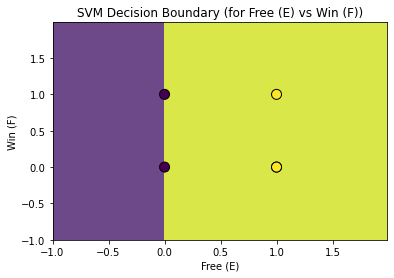

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Sample dataset
data = {
    'Email ID': [1, 2, 3, 4, 5],
    'Free (E)': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Win (F)': ['No', 'Yes', 'Yes', 'No', 'No'],
    'Age': [23, 45, 34, 50, 30],
    'Income': [50000, 60000, 70000, 55000, 48000],
    'Spam (H)': ['Spam', 'Not Spam', 'Spam', 'Not Spam', 'Spam']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data into numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Free (E)'] = label_encoder.fit_transform(df['Free (E)'])
df['Win (F)'] = label_encoder.fit_transform(df['Win (F)'])
df['Spam (H)'] = label_encoder.fit_transform(df['Spam (H)'])  # Target column

# Features (X) and target (y)
X = df[['Free (E)', 'Win (F)', 'Age', 'Income']]  # Features
y = df['Spam (H)']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualizing the SVM decision boundary (for Free (E) vs Win (F) only)
X_vis = X[['Free (E)', 'Win (F)']]  # Two features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train the SVM with the selected features
svm_clf_vis = SVC(kernel='linear', random_state=42)
svm_clf_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid for visualization
x_min, x_max = X_vis['Free (E)'].min() - 1, X_vis['Free (E)'].max() + 1
y_min, y_max = X_vis['Win (F)'].min() - 1, X_vis['Win (F)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis['Free (E)'], X_vis['Win (F)'], c=y, edgecolors='k', marker='o', s=100)
plt.title("SVM Decision Boundary (for Free (E) vs Win (F))")
plt.xlabel('Free (E)')
plt.ylabel('Win (F)')
plt.show()
